In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

In [2]:
data = pd.read_csv("week4_data/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# EDA
## 기본 정보

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- age : min 값이 0.08? 값 확인해보기
- hypertension, heart_disease, stroke : 이진형 변수, 0 비율이 훨씬 많은 듯
- avg_glucose_level : 분포 확인해보기, 약간 왼쪽으로 기운 듯
- bmi : 편차가 크다. boxplot 그려보면 이상치 나올 듯

In [19]:
data.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## 시각화

In [16]:
nuniq = data.nunique()
nuniq

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [18]:
# 범주형 변수와 수치형 변수 분리
cat_cols = nuniq[nuniq < 10].index.to_list()
num_cols = nuniq[nuniq >=10].index.to_list()

cat_cols, num_cols

(['gender',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status',
  'stroke'],
 ['id', 'age', 'avg_glucose_level', 'bmi'])

In [20]:
len(cat_cols), len(num_cols)

(8, 4)

### 범주형 변수

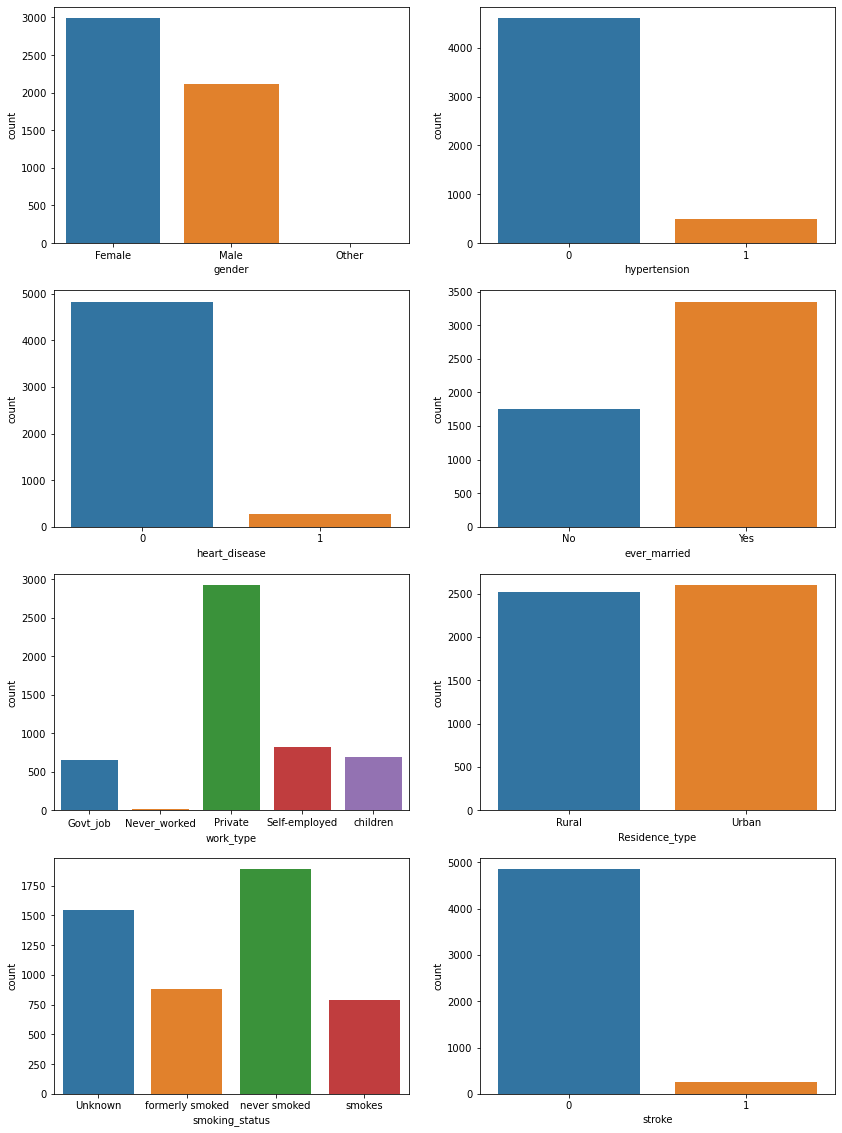

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,20))

for i, col_name in enumerate(cat_cols):
    val_order = sorted(data[col_name].unique())
    sns.countplot(data=data, x=col_name, order=val_order, ax=axes[i//2, i%2])

In [30]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [31]:
data[data["gender"]=="Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


- gender가 other라는 것은 성전환 등의 이유일지, 아니면 기록상의 오류일지?
- 데이터 수가 1개뿐이므로 drop 하는 것이 좋을 듯 하다.

In [32]:
data["stroke"].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

- 우리가 예측해야 하는 변수인 stroke 변수의 비율이 95:5 이므로, 정확도보다 F1 score를 성능 지표로 사용하는 것이 옳을 것으로 보인다.

### 수치형 변수